In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
print(tf.__version__)

2.11.0


In [2]:
# more details about the dataset in this link https://archive.ics.uci.edu/ml/datasets/auto+mpg
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\DTE-LAPC-128-21\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
# mpg - fuel efficiency measured in miles per gallon (mpg)
# number of cylinders in the engine
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Prepare the data

In [5]:
# Prepare the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
dataset = dataset.drop_duplicates()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
# The "Origin" column is really categorical, not numeric. So convert that to a one-hot
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [9]:
# one-hot encoding
dataset = pd.get_dummies(dataset, prefix='Origin', prefix_sep='_')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [10]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin_Europe', 'Origin_Japan',
       'Origin_USA'],
      dtype='object')

In [11]:
dataset.shape

(392, 10)

In [12]:
# Split the data into train (80%) and test (%20)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [13]:
train_dataset.shape , test_dataset.shape

((314, 10), (78, 10))

In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin_Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Origin_Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
Origin_USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [15]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin_Europe', 'Origin_Japan',
       'Origin_USA'],
      dtype='object')

In [16]:
norm_cols = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']

train_stats = train_dataset[norm_cols].describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8


# self study :
- Handle "Model Year" feature
- Try transformer for feature engineering

In [17]:
#  Split features from labels (miles per gallon= MPG)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

train_dataset[norm_cols] = norm(train_dataset[norm_cols])
test_dataset[norm_cols] = norm(test_dataset[norm_cols])

In [18]:
train_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
146,4,-1.009459,-0.784052,-1.025303,-0.379759,74,0,0,1
282,4,-0.530218,-0.442811,-0.118796,0.624102,79,0,0,1
69,8,1.482595,1.447140,1.736877,-0.738281,72,0,0,1
378,4,-0.865687,-1.099044,-1.025303,-0.308055,82,0,0,1
331,4,-0.942365,-0.994047,-1.001603,0.875068,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,0.044872,-0.521559,-0.000298,0.946772,79,0,0,1
229,8,1.961837,1.972127,1.457223,-1.598734,77,0,0,1
150,4,-0.836932,-0.311564,-0.710099,-0.021237,74,0,1,0
145,4,-1.076553,-1.151543,-1.169870,1.233589,74,0,1,0


In [19]:
normed_train_data = train_dataset.copy()
normed_test_data = test_dataset.copy()

In [20]:
normed_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707e+00,1.699788,3.000000,4.000000,4.000000,8.000000,8.000000
Displacement,314.0,8.627211e-17,1.000000,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.000000,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.000000,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.000000,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,7.589809e+01,3.675642,70.000000,73.000000,76.000000,79.000000,82.000000
Origin_Europe,314.0,1.783439e-01,0.383413,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_Japan,314.0,1.974522e-01,0.398712,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_USA,314.0,6.242038e-01,0.485101,0.000000,0.000000,1.000000,1.000000,1.000000


## Build the ANN model

In [21]:
train_dataset.shape[1], len(train_dataset.keys())

(9, 9)

In [22]:
def build_model(input_shape=9, output_shape=1, activation='relu'):
  model = keras.Sequential([
    layers.Dense(50, activation=activation, input_shape=[input_shape]),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(output_shape)])

  # if there is no activation fuction in dense layer. then it will return sum of (weight * features + bias)
  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 666.3561 - mae: 24.6639 - mse: 666.3561 - val_loss: 671.5639 - val_mae: 24.4741 - val_mse: 671.5639
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 661.1451 - mae: 24.5573 - mse: 661.1451 - val_loss: 667.2544 - val_mae: 24.3859 - val_mse: 667.2544
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 657.0169 - mae: 24.4733 - mse: 657.0169 - val_loss: 663.3315 - val_mae: 24.3053 - val_mse: 663.3315
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 653.1463 - mae: 24.3940 - mse: 653.1463 - val_loss: 659.5532 - val_mae: 24.2275 - val_mse: 659.5532
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 649.3754 - mae: 24.3170 - mse: 649.3754 - val_loss: 655.8087 - val_mae: 24.1501 - val_mse: 655.8087
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 645.6368 - mae: 24.2398 - mse: 645.6368 - val_loss: 652.1170 - val_mae: 2

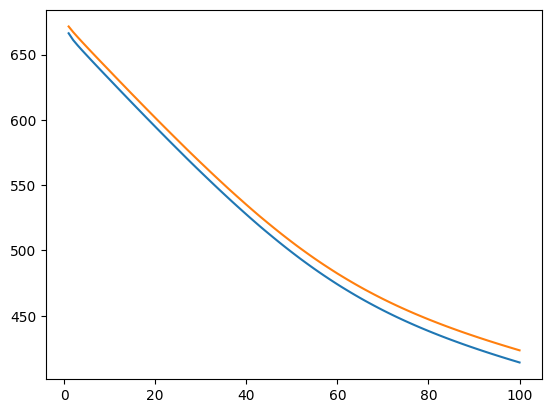

3/3 - 0s - loss: 446.5076 - mae: 19.5244 - mse: 446.5076 - 159ms/epoch - 53ms/step
Testing set Mean Abs Error: 19.52 MPG
Testing set Mean Squared Error: 446.51 MPG**2


In [23]:

EPOCHS = 100
# model build
model = build_model(activation='sigmoid')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 39ms/step - loss: 490.0857 - mae: 20.7926 - mse: 490.0857 - val_loss: 455.4516 - val_mae: 19.5552 - val_mse: 455.4516
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 413.3054 - mae: 18.8570 - mse: 413.3054 - val_loss: 384.8658 - val_mae: 17.6829 - val_mse: 384.8658
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 350.1828 - mae: 17.1179 - mse: 350.1828 - val_loss: 330.9433 - val_mae: 16.1193 - val_mse: 330.9433
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 298.9348 - mae: 15.6055 - mse: 298.9348 - val_loss: 284.1000 - val_mae: 14.6234 - val_mse: 284.1000
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 254.6992 - mae: 14.1260 - mse: 254.6992 - val_loss: 243.1603 - val_mae: 13.1724 - val_mse: 243.1603
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 214.9806 - mae: 12.6594 - mse: 214.9806 - val_loss: 205.6897 - val_mae: 11.6977 - v

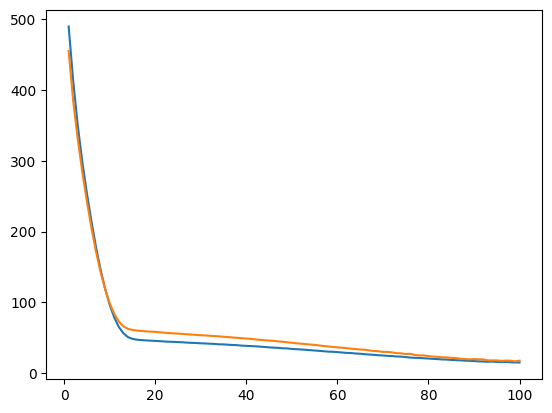

Testing set Mean Abs Error:  2.65 MPG
Testing set Mean Squared Error: 13.77 MPG**2


In [24]:
# model build
model = build_model(activation='relu')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 27ms/step - loss: 208.3897 - mae: 12.3538 - mse: 208.3897 - val_loss: 171.4036 - val_mae: 10.3448 - val_mse: 171.4036
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 136.1056 - mae: 9.3397 - mse: 136.1056 - val_loss: 123.3650 - val_mae: 8.4585 - val_mse: 123.3650
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 96.6215 - mae: 7.5239 - mse: 96.6215 - val_loss: 92.9566 - val_mae: 7.4969 - val_mse: 92.9566
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 71.7678 - mae: 6.5718 - mse: 71.7678 - val_loss: 74.9166 - val_mae: 6.9669 - val_mse: 74.9166
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 57.9693 - mae: 6.1070 - mse: 57.9693 - val_loss: 65.7598 - val_mae: 6.8200 - val_mse: 65.7598
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 51.0907 - mae: 5.8813 - mse: 51.0907 - val_loss: 61.9811 - val_mae: 6.7580 - val_mse: 61.9811
Epoch 7/100

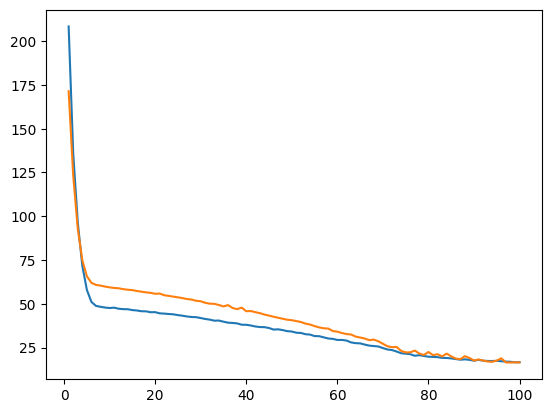

Testing set Mean Abs Error:  2.82 MPG
Testing set Mean Squared Error: 13.33 MPG**2


In [25]:
# model build
model = build_model(activation='leaky_relu')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 2s 39ms/step - loss: 583.5012 - mae: 22.9433 - mse: 583.5012 - val_loss: 574.8239 - val_mae: 22.4464 - val_mse: 574.8239
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 554.0539 - mae: 22.3000 - mse: 554.0539 - val_loss: 550.5005 - val_mae: 21.8983 - val_mse: 550.5005
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 531.1498 - mae: 21.7792 - mse: 531.1498 - val_loss: 529.0818 - val_mae: 21.4031 - val_mse: 529.0818
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 510.5525 - mae: 21.2919 - mse: 510.5525 - val_loss: 509.4934 - val_mae: 20.9390 - val_mse: 509.4934
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 491.4530 - mae: 20.8412 - mse: 491.4530 - val_loss: 491.1971 - val_mae: 20.4953 - val_mse: 491.1971
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 473.7497 - mae: 20.4124 - mse: 473.7497 - val_loss: 474.3364 - val_mae: 20.0775 

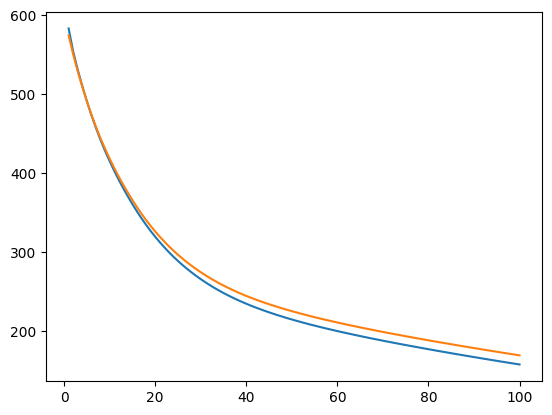

Testing set Mean Abs Error: 10.91 MPG
Testing set Mean Squared Error: 178.37 MPG**2


In [26]:
# model build
model = build_model(activation='tanh')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                500       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 50ms/step - loss: 569.5602 - mae: 22.5693 - mse: 569.5602 - val_loss: 533.1024 - val_mae: 21.4152 - val_mse: 533.1024
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 499.3982 - mae: 20.9912 - mse: 499.3982 - val_loss: 478.2480 - val_mae: 20.1095 - val_mse: 478.2480
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 448.3712 - mae: 19.7498 - mse: 448.3712 - val_loss: 431.6517 - val_mae: 18.9319 - val_mse: 431.6517
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 403.3492 - mae: 18.5913 - mse: 403.3492 - val_loss: 389.1340 - val_mae: 17.7918 - val_mse: 389.1340
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 361.6753 - mae: 17.4539 - mse: 361.6753 - val_loss: 349.2275 - val_mae: 16.6518 - val_mse: 349.2275
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 322.6387 - mae: 16.3051 - mse: 322.6387 - val_loss: 312.1544 - val_mae: 15.5178 - v

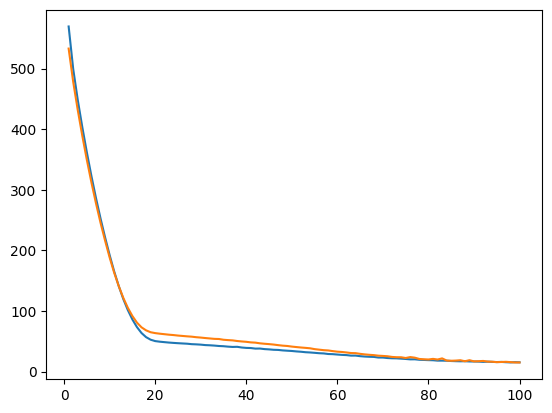

Testing set Mean Abs Error:  2.58 MPG
Testing set Mean Squared Error: 12.37 MPG**2


In [27]:
# model build
model = build_model(activation='swish')
model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))